## Rolling Windows Function with Pandas

In [82]:
# Import Packages
import pandas as pd
import matplotlib.pyplot as plt
import numpy as np
from numpy.random import seed,normal, choice
from scipy.stats import norm 
import seaborn as sns

### Rolling average air quality since 2010 for new york city

<class 'pandas.core.frame.DataFrame'>
DatetimeIndex: 6291 entries, 2000-01-01 to 2017-03-31
Data columns (total 1 columns):
 #   Column  Non-Null Count  Dtype  
---  ------  --------------  -----  
 0   Ozone   6167 non-null   float64
dtypes: float64(1)
memory usage: 98.3 KB
None


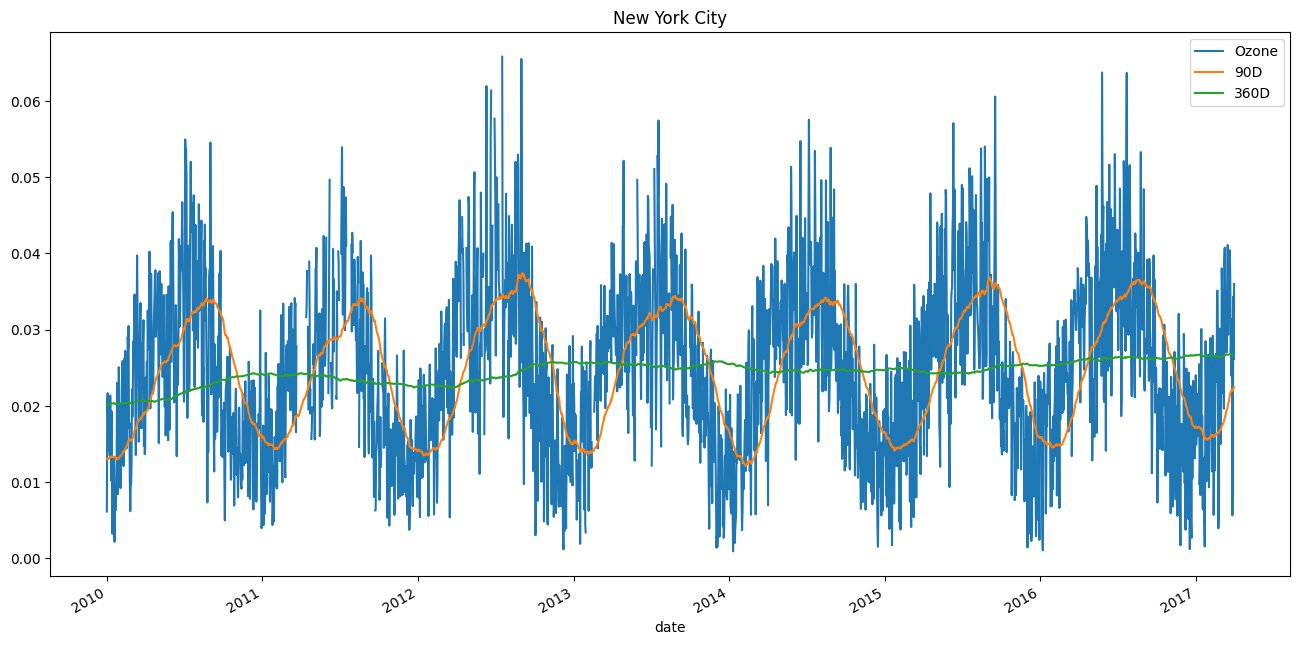

In [8]:
data = pd.read_csv('../data/ozone_nyc.csv', parse_dates=['date'], index_col='date')
print(data.info())

# Add the columns '90D' and '360D' containing the 90 and 360 rolling calendar day .mean() for the column 'Ozone'
data['90D'] = data.Ozone.rolling('90D').mean()
data['360D'] = data.Ozone.rolling('360D').mean()

# Plot data
data['2010':].plot(title='New York City', figsize=(16,8))
plt.show()

### Rolling 360-day median & std. deviation for nyc ozone data since 2000

<class 'pandas.core.frame.DataFrame'>
DatetimeIndex: 6167 entries, 2000-01-01 to 2017-03-31
Data columns (total 1 columns):
 #   Column  Non-Null Count  Dtype  
---  ------  --------------  -----  
 0   Ozone   6167 non-null   float64
dtypes: float64(1)
memory usage: 96.4 KB
None


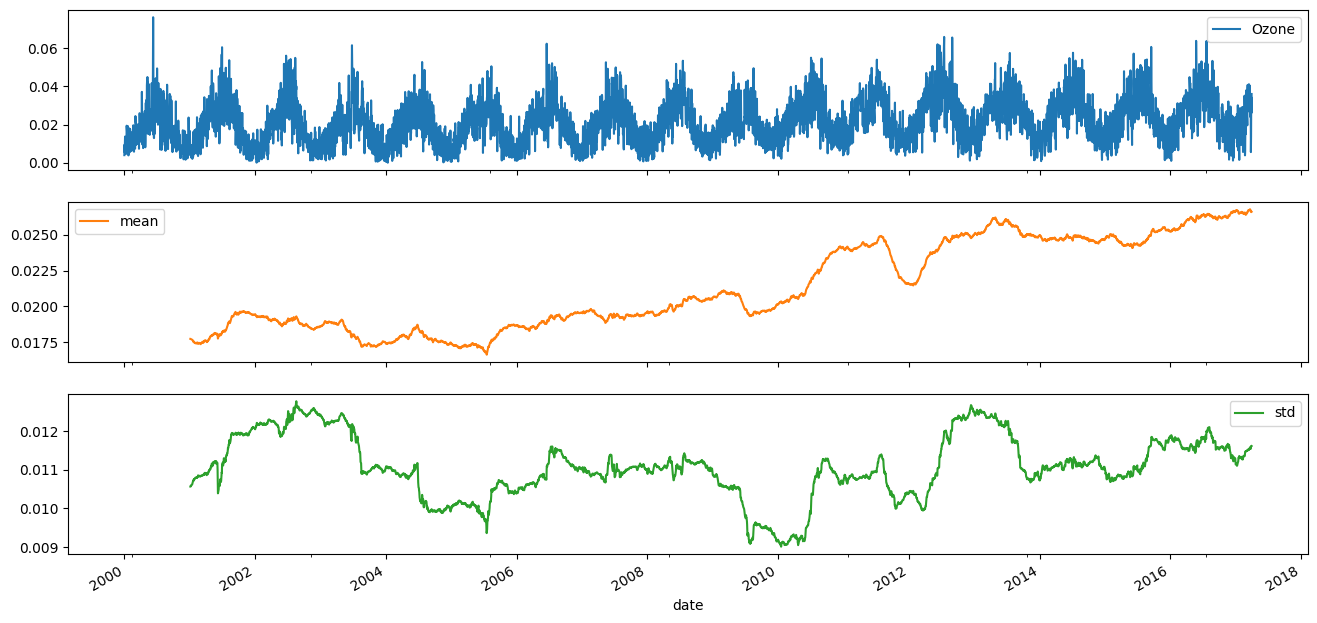

In [12]:
data = pd.read_csv('../data/ozone_nyc.csv', parse_dates=['date'], index_col='date').dropna()
print(data.info())

# Select the 'Ozone' column and create a .rolling() window using 360 periods, apply .agg() to calculate the mean and std, and assign this to rolling_stats.
rolling_stats = data.Ozone.rolling(360).agg(['mean', 'std'])

# Use .join() to concatenate data with rolling_stats, and assign to stats.
stats = data.join(rolling_stats)

stats.plot(subplots=True, figsize=(16,8))
plt.show()

### Rolling quantiles for daily air quality in nyc

<class 'pandas.core.frame.DataFrame'>
DatetimeIndex: 6167 entries, 2000-01-01 to 2017-03-31
Data columns (total 1 columns):
 #   Column  Non-Null Count  Dtype  
---  ------  --------------  -----  
 0   Ozone   6167 non-null   float64
dtypes: float64(1)
memory usage: 96.4 KB
None


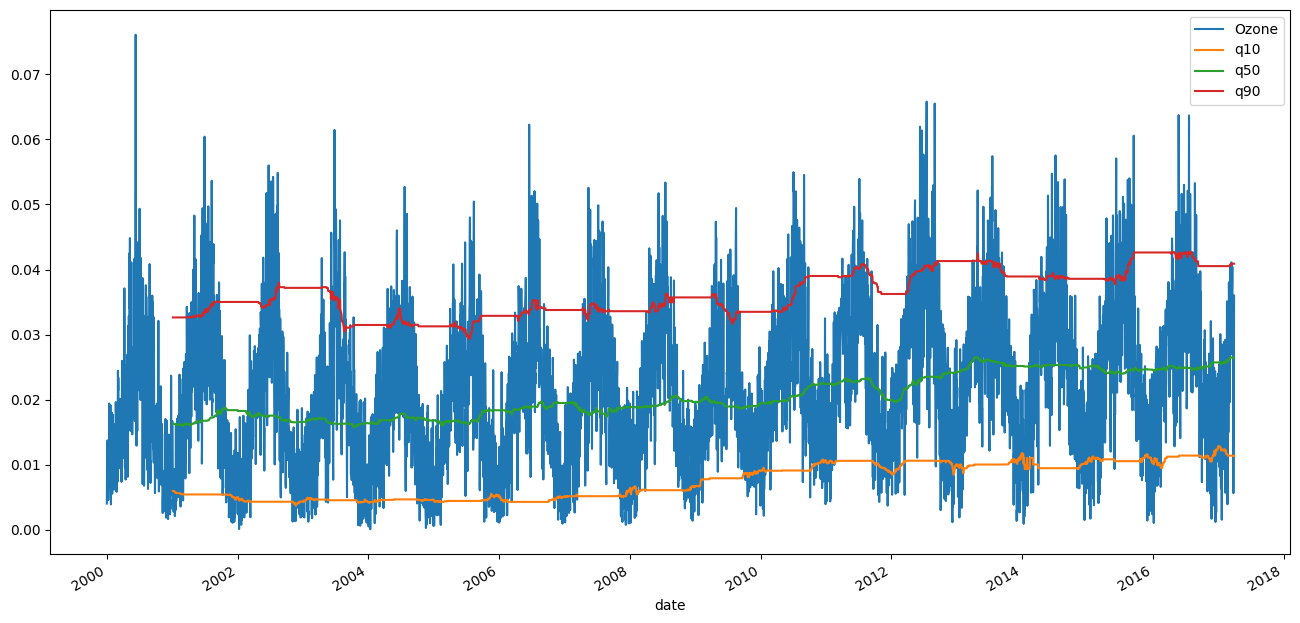

In [15]:
data = pd.read_csv('../data/ozone_nyc.csv', parse_dates=['date'], index_col='date').dropna()
data = data['2000':'2017']
print(data.info())

# Create a .rolling() window using 360 periods, select the column 'Ozone', and assign the result to rolling.
rolling = data.Ozone.rolling(360)

# Insert three new columns, 'q10', 'q50' and 'q90' into data, calculating the respective quantiles from rolling.
data['q10'] = rolling.quantile(0.1)
data['q50'] = rolling.quantile(0.5)
data['q90'] = rolling.quantile(0.9)

# Plot the data
data.plot(figsize=(16,8))
plt.show()

## Expanding Windows Function with Pandas

### Cumulative sum vs .diff()

In [69]:
data = pd.read_csv('../data/google.csv', parse_dates=['Date'], index_col='Date')
#print(data.info())

# Apply .diff() to data, drop missing values, and assign the result to differences
differences = data.dropna().diff()

# Use .first('D') to select the first price from data, and assign it to start_price.
start_price = data.head(1)
# Use .append() to combine start_price and differences, apply .cumsum() and assign this to cumulative_sum
cumulative_sum = pd.concat([start_price,differences]).cumsum()
# Use .equals() to compare data and cumulative_sum, and print the result.
print(data.equals(cumulative_sum))

False


### Cumulative return on $1,000 invested in google vs apple I

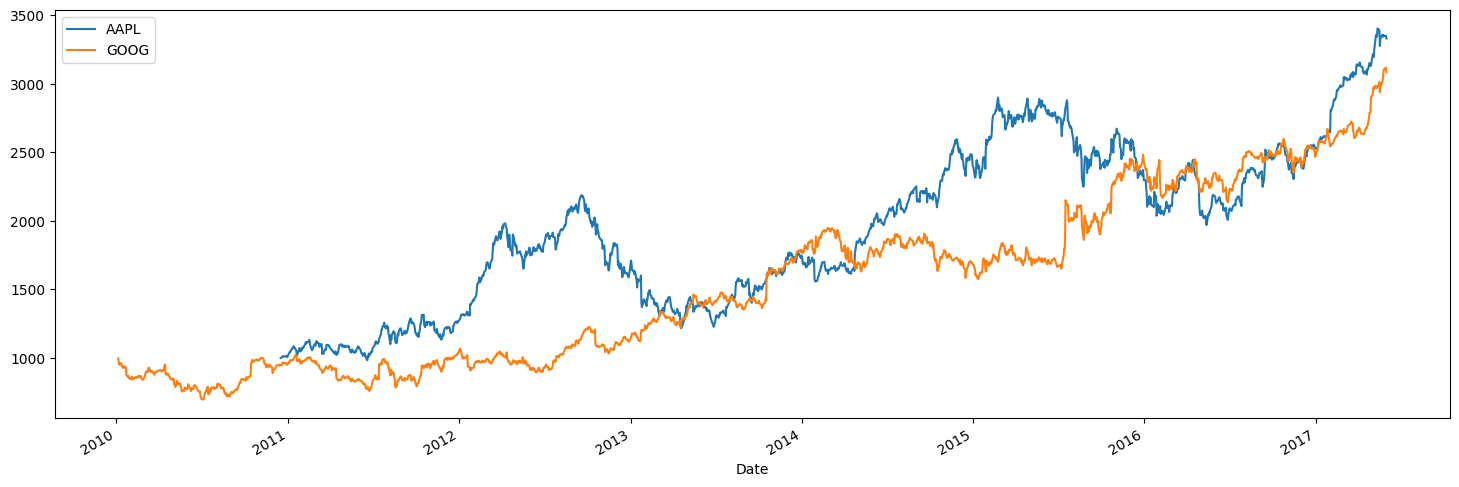

In [72]:
data = pd.read_csv('../data/apple_google.csv', parse_dates=['Date'], index_col='Date')

# Define a variable investment with the value 1000.
investment = 1000

# Calculate returns by applying .pct_change() to data
returns = data.pct_change()

# Add 1 to returns and assign this to returns_plus_one, then apply .cumprod() to returns_plus_one and assign the result to cumulative_return.
returns_plus_one = returns.add(1)
cumulative_return = returns_plus_one.cumprod()

# Multiply cumulative_return by investment, and plot the result.
cumulative_return.mul(investment).plot(figsize=(18,6))
plt.show()

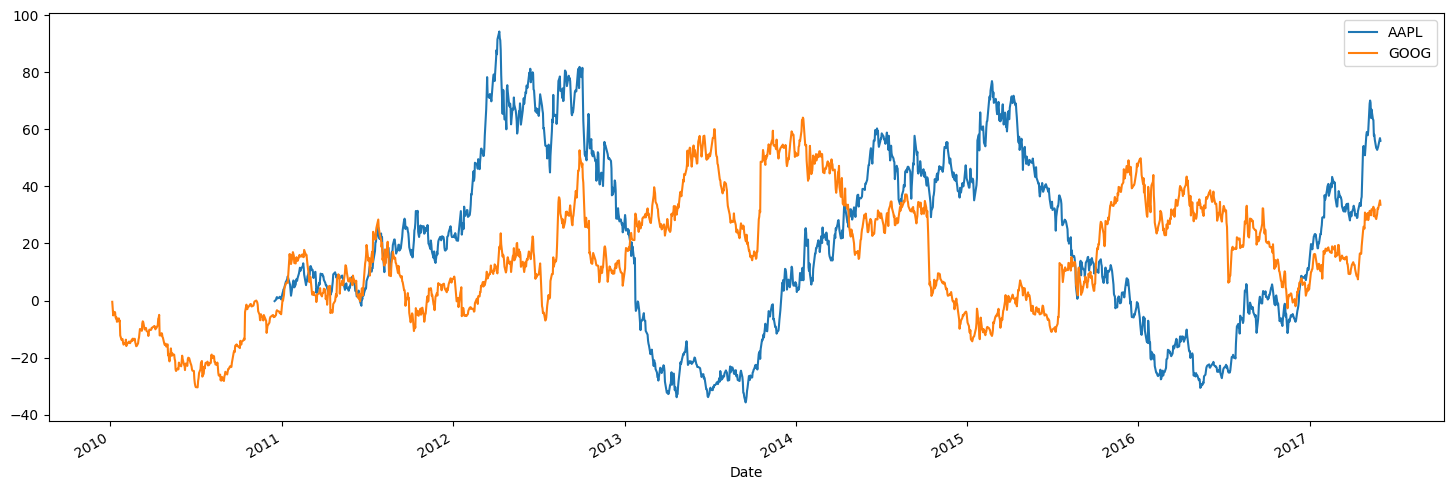

In [74]:
# Define a multi_period_return() function that returns the cumulative return from an array of period returns.
def multi_period_return(period_returns):
    return np.prod(period_returns + 1) -1

# Calculate daily_returns by applying .pct_change() to data
daily_returns = data.pct_change()

# Create a '360D' .rolling() window on daily_returns, and .apply() multi_period_returns. Assign the result to rolling_annual_returns.
rolling_annual_returns = daily_returns.rolling('360D').apply(multi_period_return)

# Plot rolling_annual_returns after multiplying it by 100.
rolling_annual_returns.mul(100).plot(figsize=(18,6))
plt.show()

## Price Simulation with Numpy Random Walk

### Random Walk I (Create a Random Price Path)

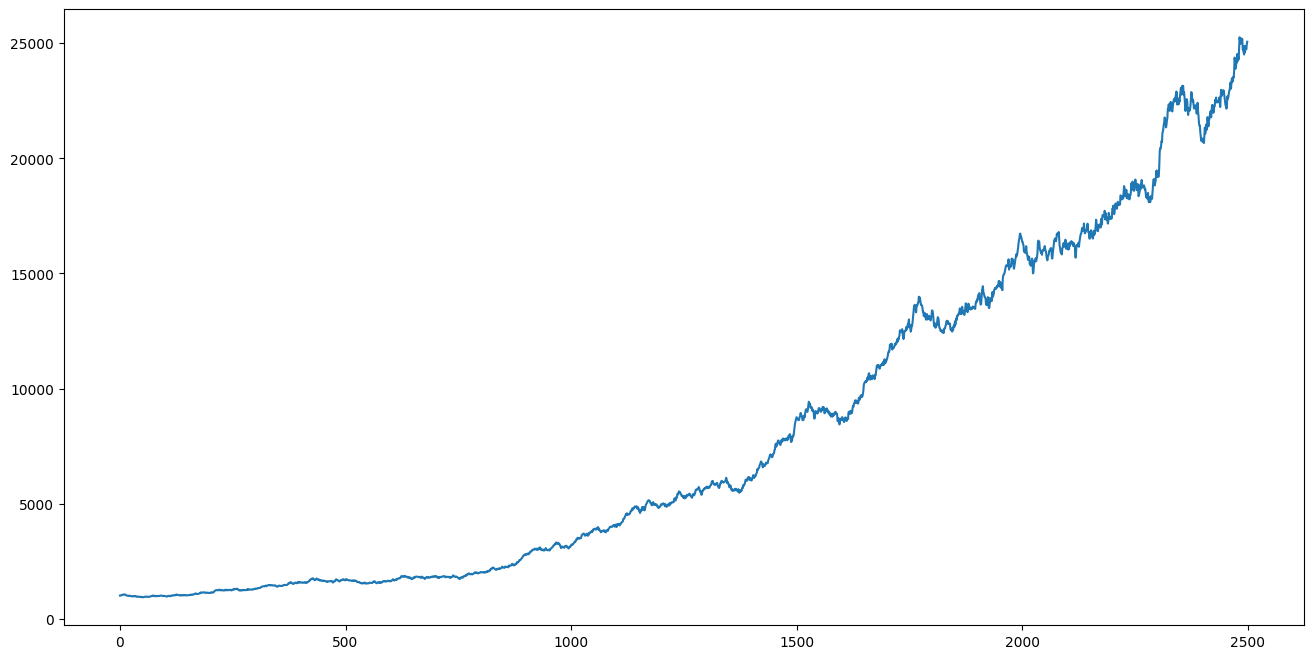

In [81]:
# Set seed to 42.
seed(42)

# Use normal to generate 2,500 random returns with the parameters loc=.001, scale=.01 and assign this to random_walk.
random_walk = normal(loc=.001, scale=.01,size=2500)

# Convert random_walk to a pd.Series object and reassign it to random_walk.
random_walk = pd.Series(random_walk)

# Create random_prices by adding 1 to random_walk and calculating the cumulative product.
random_prices = random_walk.add(1).cumprod()

# Multiply random_prices by 1,000 and plot the result for a price series starting at 1,000.
random_prices.mul(1000).plot(figsize=(16,8))
plt.show()

### Random Walk II (Create a Random Price Path based on Random Samples selected)

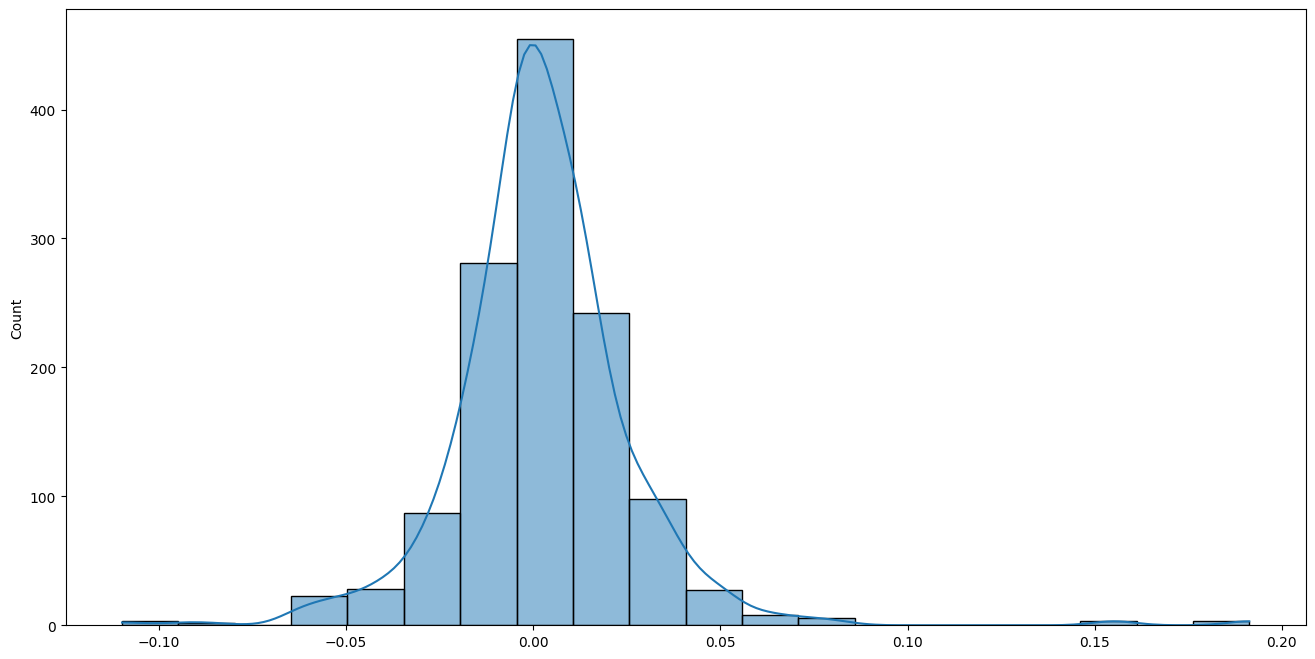

In [137]:
# Import FaceBook stock price series since IPO in May 2012 as the variable fb

fb = pd.read_csv('../data/fb.csv', header=None, parse_dates=[0])
fb.columns = ['date','price']
fb['date'] = pd.to_datetime(fb['date'])
fb.set_index('date', inplace=True)

# Set seed to 42.
seed(42)

# Apply .pct_change() to generate daily Facebook returns, drop missing values, and assign to daily_returns.
daily_returns = fb.pct_change().dropna()
daily_returns = pd.Series(daily_returns['price'])

# Create a variable n_obs that contains the .count() of Facebook daily_returns
n_obs = daily_returns.count()

# Use choice() to randomly select n_obs samples from daily_returns, and assign to random_walk
random_walk = choice(daily_returns, size=n_obs)

# Convert random_walk to a pd.Series and reassign it to itself.
random_walk = pd.Series(random_walk)

# Use sns.distplot() to plot the distribution of random_walk
fig, ax = plt.subplots(figsize=(16, 8))
sns.histplot(random_walk, kde=True, bins=20, ax=ax)
plt.show();

### Random Walk III

C:\Python_Prac\timeseries_analysis\.venv\Lib\site-packages\numpy\_core\fromnumeric.py:57: RuntimeWarning: overflow encountered in accumulate
  return bound(*args, **kwds)


price     3.800000e+01
random             NaN
0         8.366440e+02
1         1.839368e+04
2         4.040520e+05
              ...     
1261               inf
1262               inf
1263               inf
1264               inf
1265               inf
Length: 1268, dtype: float64


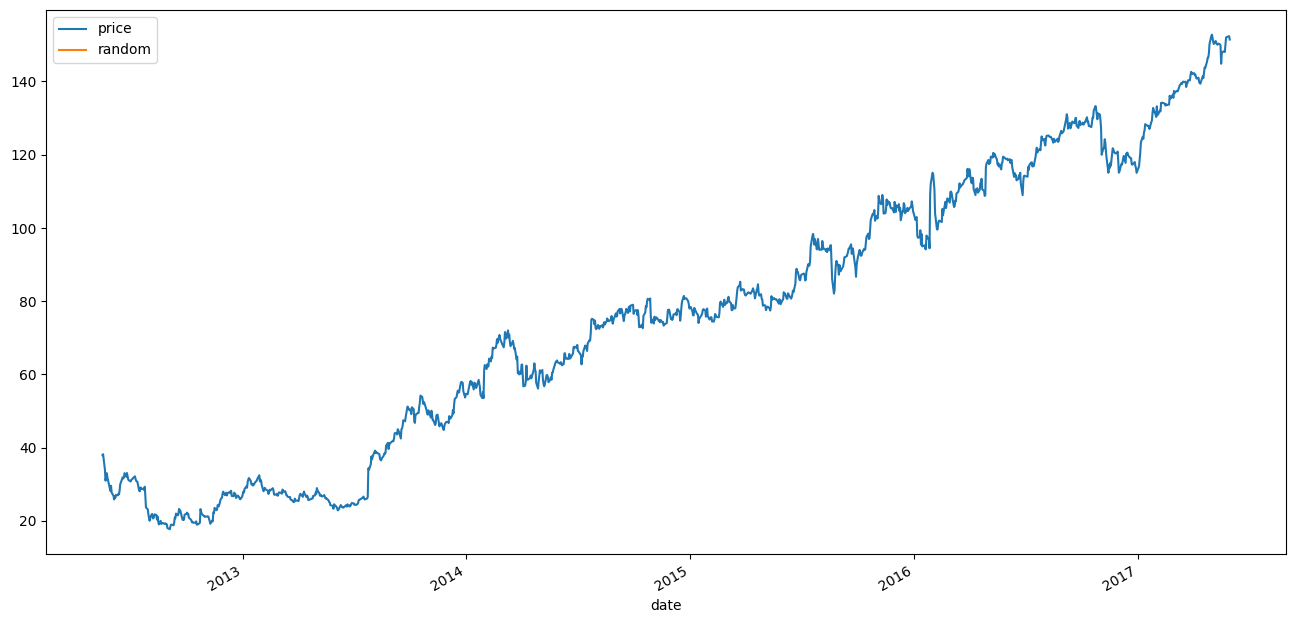

In [163]:
# Select the first Facebook price by applying .first('D') to fb.price, and assign to start
start = fb.head(1).iloc[0]

# Add 1 to random_walk and reassign it to itself, then .append() random_walk to start and assign this to random_price
random_walk = random_walk.add(1)

random_price = pd.concat([start, random_walk]).cumprod()

# Apply .cumprod() to random_price and reassign it to itself.
#random_price = random_price.cumprod()
print(random_price)
#Insert random_price as new column labeled random into fb and plot the result.
fb['random'] = random_price
fb.plot(figsize=(16,8))
plt.show()

## Annual return correlations among several stocks

<class 'pandas.core.frame.DataFrame'>
DatetimeIndex: 4001 entries, 2001-07-05 to 2017-05-31
Data columns (total 5 columns):
 #   Column  Non-Null Count  Dtype  
---  ------  --------------  -----  
 0   AAPL    4000 non-null   float64
 1   AMZN    4000 non-null   float64
 2   IBM     4000 non-null   float64
 3   WMT     4000 non-null   float64
 4   XOM     4000 non-null   float64
dtypes: float64(5)
memory usage: 187.5 KB
None
          AAPL      AMZN       IBM       WMT       XOM
AAPL  1.000000  0.208731  0.460568 -0.183553  0.336413
AMZN  0.208731  1.000000  0.346407 -0.367620 -0.133965
IBM   0.460568  0.346407  1.000000  0.155445  0.367253
WMT  -0.183553 -0.367620  0.155445  1.000000  0.178833
XOM   0.336413 -0.133965  0.367253  0.178833  1.000000


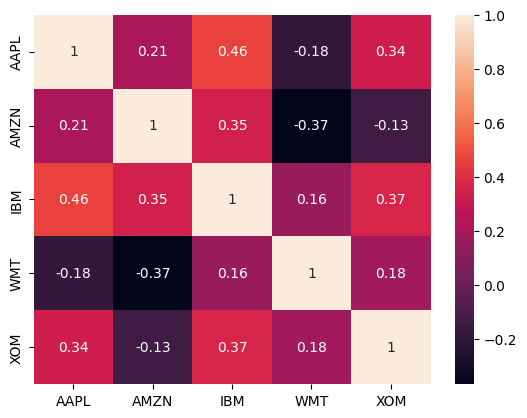

In [170]:
data = pd.read_csv('../data/5_stocks.csv', parse_dates=['Date'], index_col='Date')

# Inspect using .info().
print(data.info())

# Apply .resample() with year-end frequency (alias: 'A') to data and select the .last() price from each subperiod; assign this to annual_prices.
annual_prices = data.resample('YE').last()

# Calculate annual_returns by applying .pct_change() to annual_prices.
annual_returns = annual_prices.pct_change()

# Calculate correlations by applying .corr() to annual_returns and print the result.
correlations = annual_returns.corr()
print(correlations)

# Visualize the correlations as heatmap here
sns.heatmap(correlations, annot=True)
plt.show()